In [2]:
# The problem: Is how students performnace that can summarize in test score can be affected (Positively or negatively) by other variables

In [3]:
# Stpeps:

# Problem statement
# Data collection
# Data checks
# Data analysis
# Data Pre-Processing
# Model training
# Chose best model

In [4]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("../"))

from src.Components.Data_ingestion import TypeFile

In [5]:
df = TypeFile().Ingest("/home/amine/Desktop/Projects/endtoend_DS_withdeploy/Notebook/Data/stud.csv")

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.isnull().sum() # No missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()
# if there's any duplicate df.drop_duplicates(inplace=True), inplace = True change the original data frame without creating new dataframe good fro memory optimization

0

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
from src.Components.Data_inspection import SetDataDescription, GeneralInspect, SatatisticalInspect

In [11]:
inspection = SetDataDescription(GeneralInspect())
inspection.execute(df)

=== General description to the data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [12]:
inspection.changeDataDescription(SatatisticalInspect())
inspection._description_method.Inspect(df)

=== Statistical description to the data ===
numerical stat ==>

        math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
Categorical stat ==>
        gender race_ethnicity parental_level_of_education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test_preparation_course  
count                     1000  
unique                       2  
top                       n

In [13]:
print("df['gender'] = ", end=' ')
print(df['gender'].unique())

print("\ndf['race_ethnicity'] = ", end=' ')
print(df['race_ethnicity'].unique())

print("\ndf['parental_level_of_education'] = ", end=' ')
print(df['parental_level_of_education'].unique())

print("\ndf['lunch'] = ", end=' ')
print(df['lunch'].unique())

print("\ndf['test_preparation_course'] = ", end=' ')
print(df['test_preparation_course'].unique())


df['gender'] =  ['female' 'male']

df['race_ethnicity'] =  ['group B' 'group C' 'group A' 'group D' 'group E']

df['parental_level_of_education'] =  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

df['lunch'] =  ['standard' 'free/reduced']

df['test_preparation_course'] =  ['none' 'completed']


In [14]:
num_coloumns = [df[n] for n in df.select_dtypes(include=(np.number)) ]
categ_coloumns = [df[o] for o in df.select_dtypes(exclude= (np.number))]

print(f'Data Frame numerical : {np.shape(num_coloumns)=} ')

print(f'Data Frame object : {np.shape(categ_coloumns)=} ')

Data Frame numerical : np.shape(num_coloumns)=(3, 1000) 
Data Frame object : np.shape(categ_coloumns)=(5, 1000) 


In [15]:
df['Total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['Average score'] = df['Total score'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
M= df[df['math_score'] == 100]['math_score'].count()
R= df[df['reading_score'] == 100]['reading_score'].count()
W= df[df['writing_score'] == 100]['writing_score'].count()

print(f'Number of student had full mark {M}')
print(f'Number of student had full mark {R}')
print(f'Number of student had full mark {W}')

Number of student had full mark 7
Number of student had full mark 17
Number of student had full mark 14


In [18]:
M= df[df['math_score'] <= 20]['math_score'].count()
R= df[df['reading_score'] <= 20]['reading_score'].count()
W= df[df['writing_score'] <= 20]['writing_score'].count()

print(f'Number of student had less mark {M}')
print(f'Number of student had less mark {R}')
print(f'Number of student had less mark {W}')

Number of student had less mark 4
Number of student had less mark 1
Number of student had less mark 3


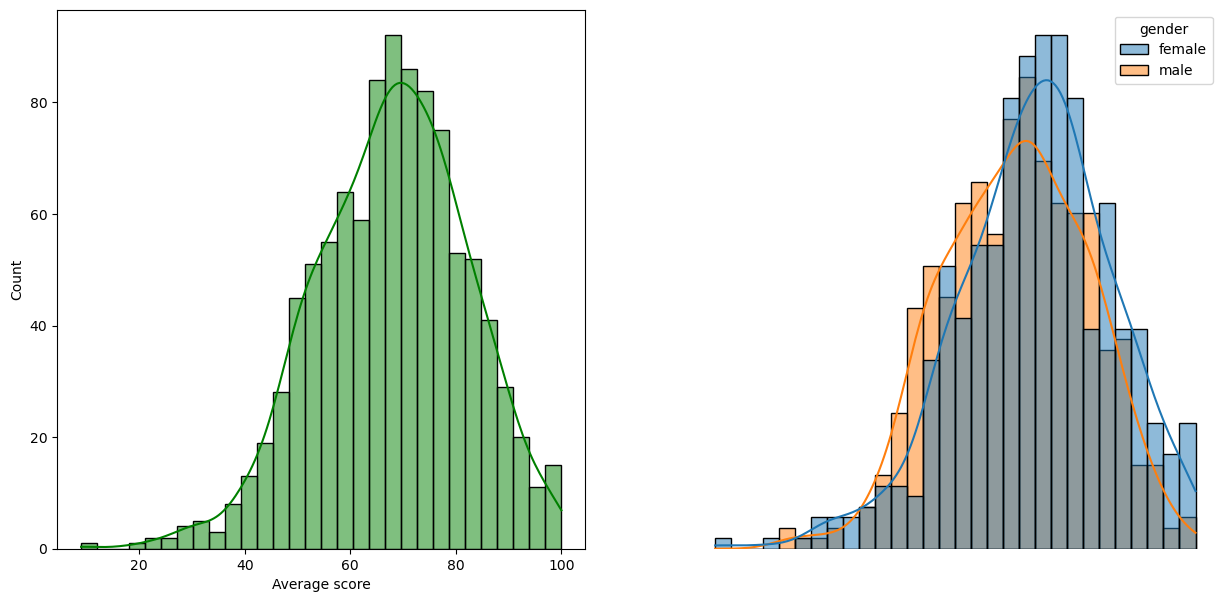

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)

sns.histplot(data= df, x='Average score', bins= 30, kde= True, color='g')

plt.subplot(122)

sns.histplot(data= df, x='Average score', bins= 30, kde= True, hue= 'gender')
plt.axis('off');

<Axes: xlabel='math_score', ylabel='Count'>

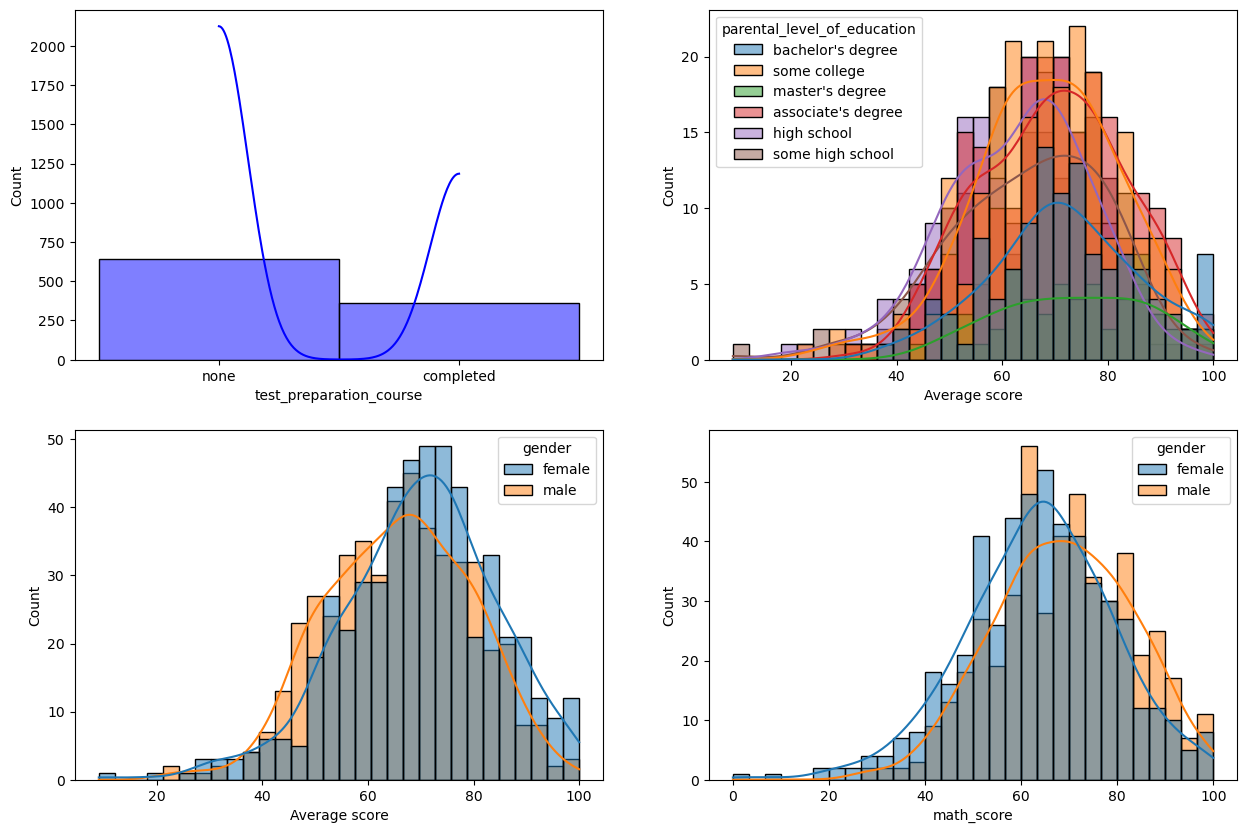

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data= df, x='test_preparation_course', bins= 30, kde= True, color='b', ax= axs[0,0])

sns.histplot(data= df, x='Average score', bins= 30, kde= True, hue= 'parental_level_of_education', ax= axs[0,1])

sns.histplot(data= df, x='Average score', bins= 30, kde= True, hue= 'gender', ax= axs[1,0])

sns.histplot(data= df, x='math_score', bins= 30, kde= True, hue= 'gender', ax= axs[1,1])

<Axes: xlabel='Average score', ylabel='Count'>

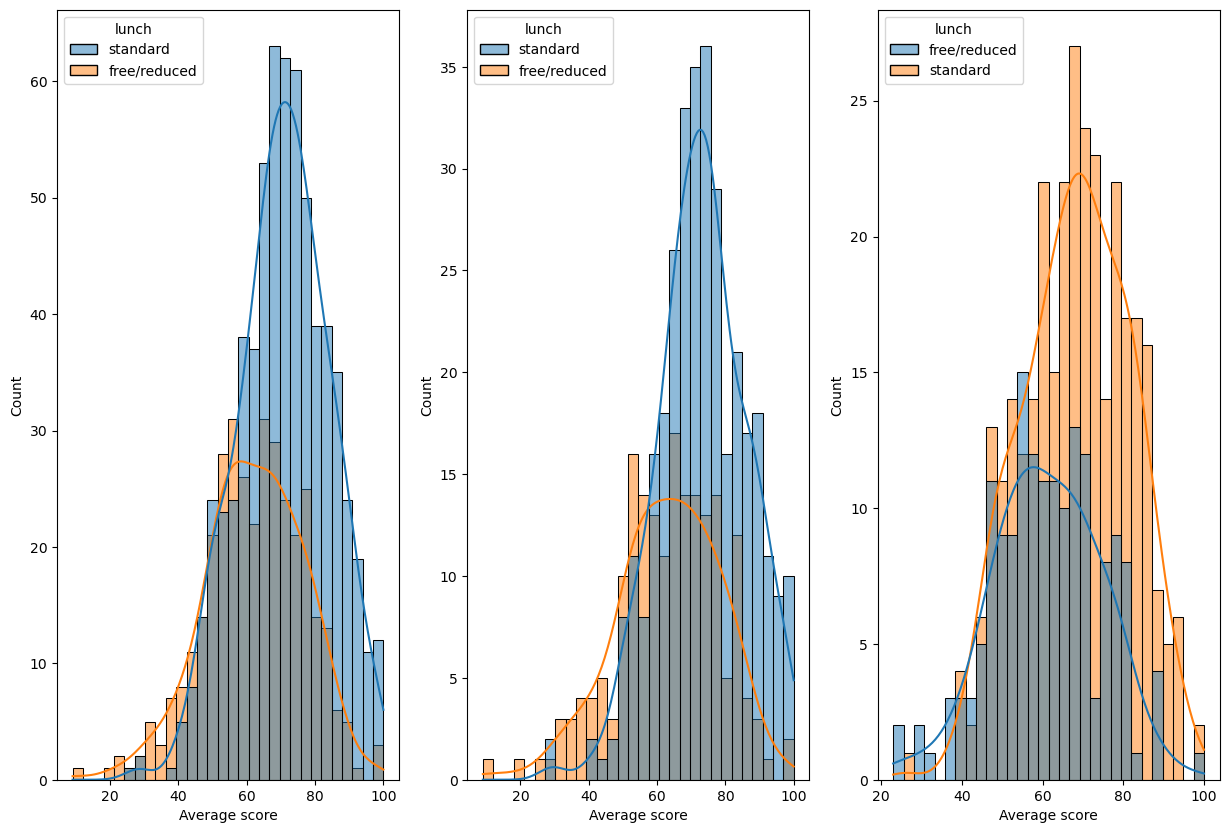

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.histplot(data= df, x='Average score', bins= 30, kde= True, hue= 'lunch', color='b', ax= axs[0])

sns.histplot(data= df[df.gender == 'female'], x='Average score', bins= 30, kde= True, hue= 'lunch', ax= axs[1])

sns.histplot(data= df[df.gender == 'male'], x='Average score', bins= 30, kde= True, hue= 'lunch', ax= axs[2])


<Axes: xlabel='Average score', ylabel='Count'>

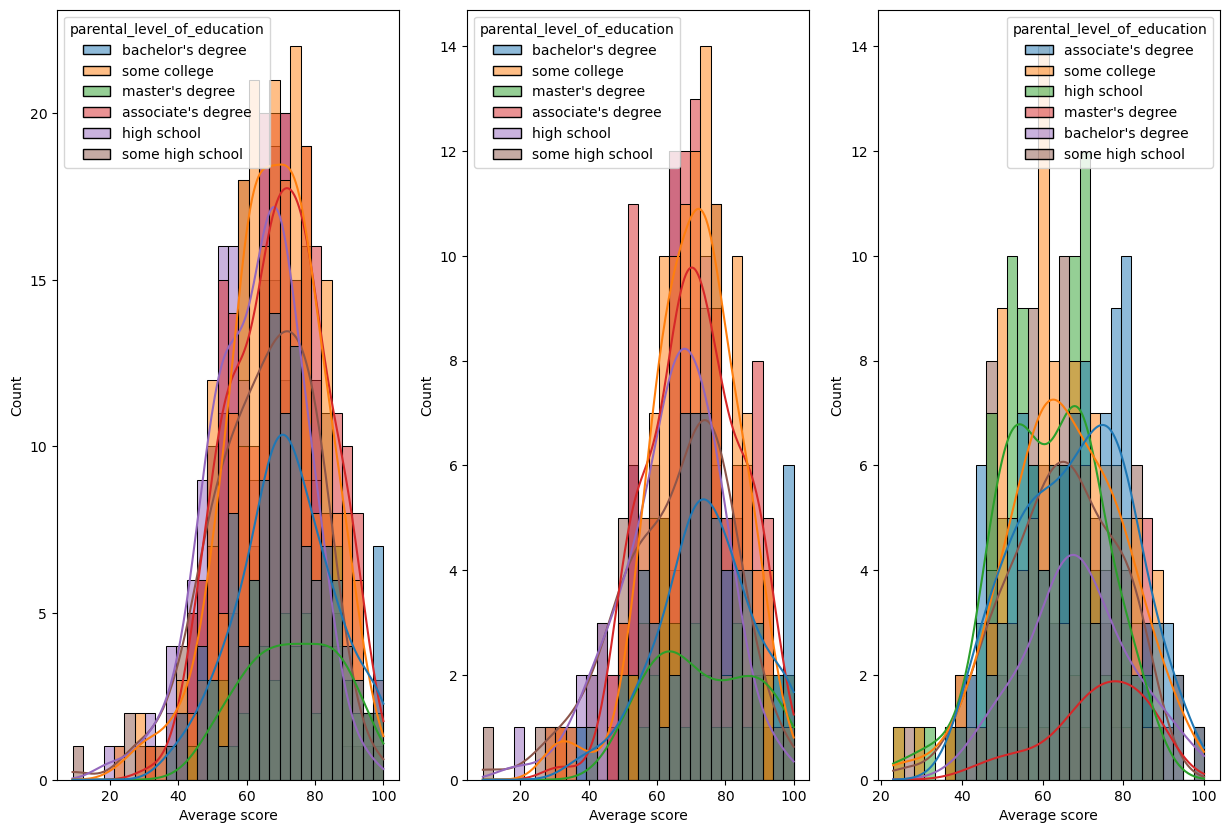

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.histplot(data= df, x='Average score', bins= 30, kde= True, hue= 'parental_level_of_education', color='b', ax= axs[0])

sns.histplot(data= df[df.gender == 'female'], x='Average score', bins= 30, kde= True, hue= 'parental_level_of_education', ax= axs[1])

sns.histplot(data= df[df.gender == 'male'], x='Average score', bins= 30, kde= True, hue= 'parental_level_of_education', ax= axs[2])


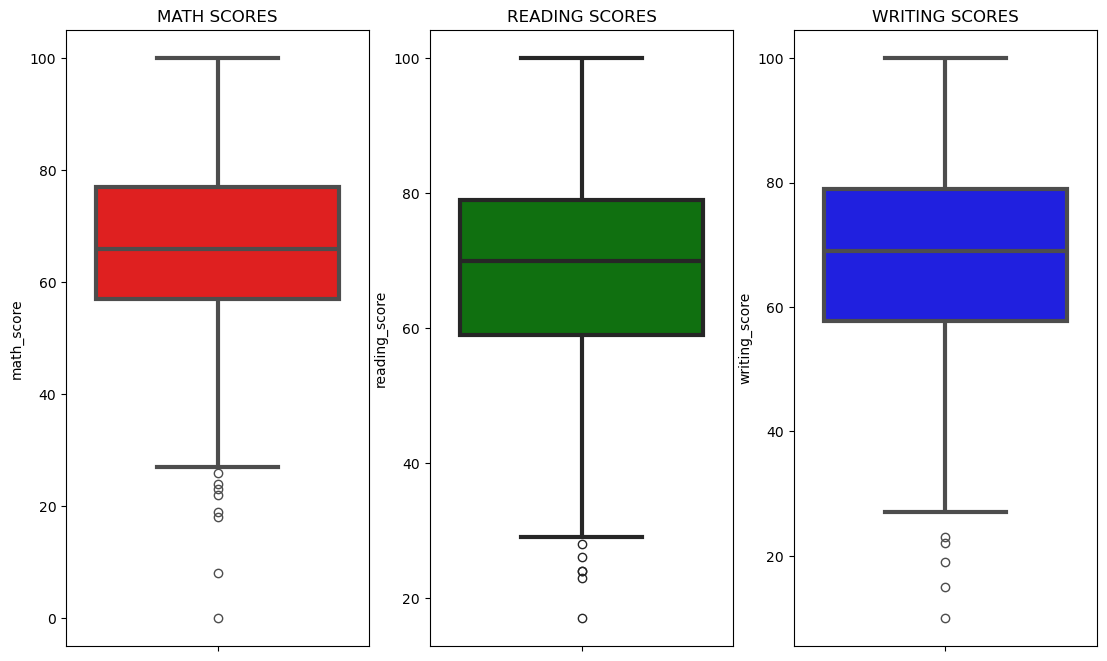

In [39]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()